Onset times (in seconds): [ 0.10303855  0.47310658  0.47310658 ... 72.86276644 72.95709751
 72.95709751]
Number of detected onsets: 1198


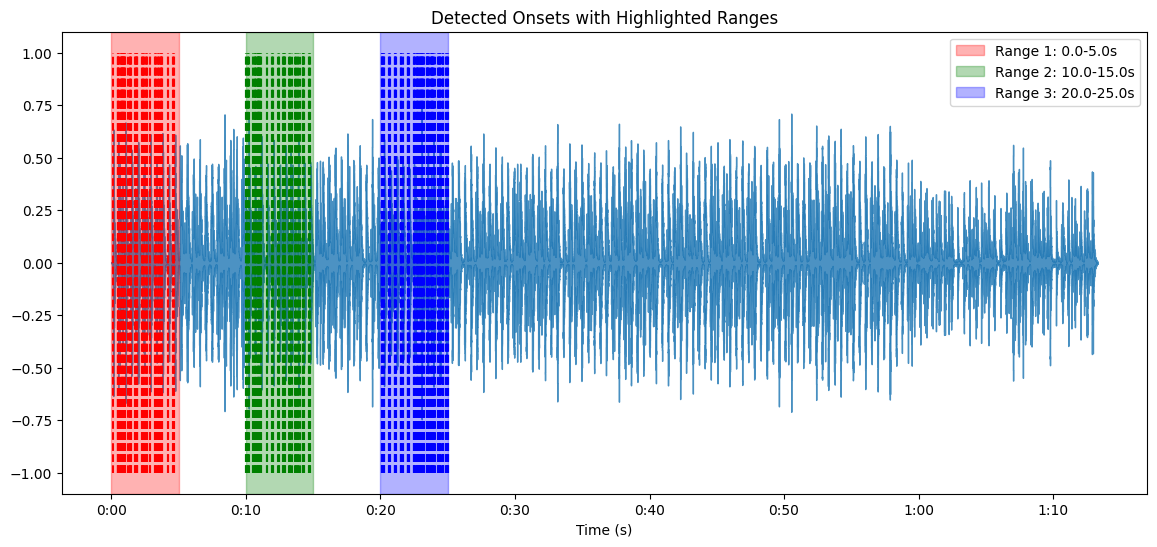

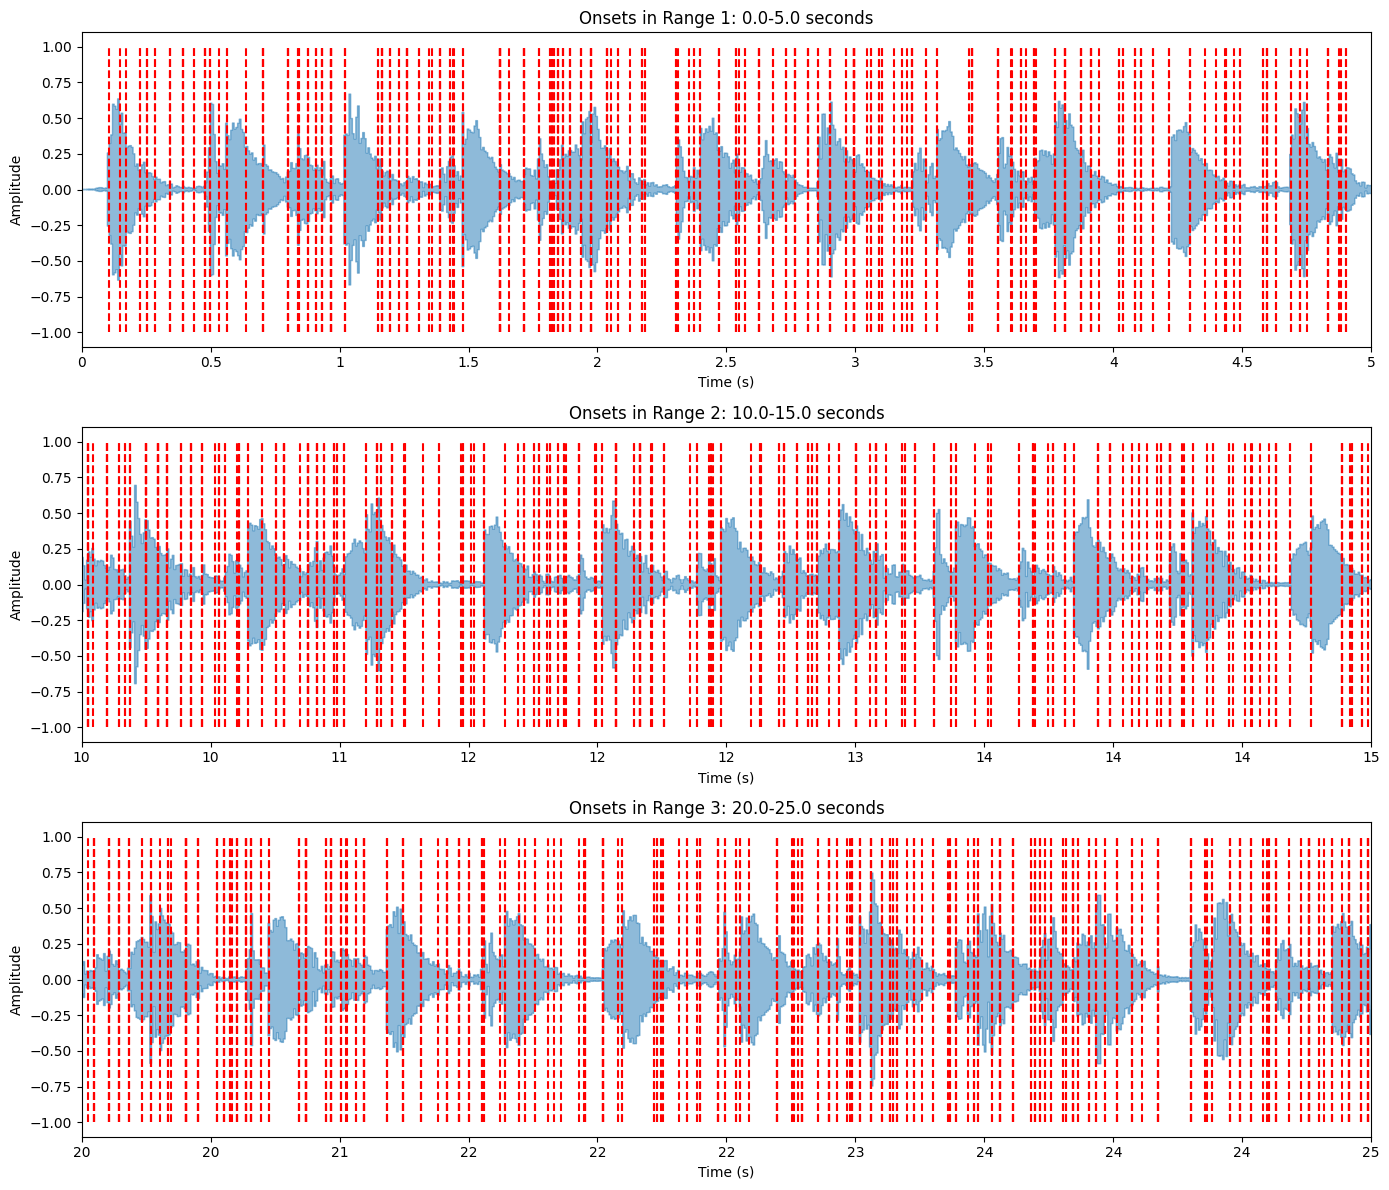

In [7]:
# Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import requests
import numpy as np

# Download the file to a local path
audio_url = 'https://github.com/egorpol/beat_it/raw/refs/heads/main/examples/vision_spectral_mono.aif'
local_audio_path = 'vision_spectral_mono.aif'

# Download the file
response = requests.get(audio_url)
with open(local_audio_path, 'wb') as f:
    f.write(response.content)

# Define the hop length globally (keeping it low for higher temporal resolution)
hop_length = 64

# Load the audio file
y, sr = librosa.load(local_audio_path, sr=None)

# Compute the onset envelope with higher resolution
onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)

# Onset detection with increased sensitivity
onset_frames = librosa.onset.onset_detect(
    onset_envelope=onset_env,
    sr=sr,
    hop_length=hop_length,
    backtrack=True,
    pre_max=1,        # Minimal pre_max for higher sensitivity
    post_max=1,       # Minimal post_max for higher sensitivity
    pre_avg=10,       # Smaller pre_avg to make the detector more responsive
    post_avg=10,      # Smaller post_avg to make the detector more responsive
    delta=0.04,      # Lower delta for higher sensitivity
    wait=0            # No wait time between onsets
)

# Convert onset frames to times
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)

# Print the onset times
print('Onset times (in seconds):', onset_times)
print('Number of detected onsets:', len(onset_times))

# Define start and stop times (in seconds)
ranges = [
    {'start': 0.0, 'stop': 5.0},
    {'start': 10.0, 'stop': 15.0},
    {'start': 20.0, 'stop': 25.0}
]

# Function to filter onsets within a given range
def filter_onsets_within_range(onsets, start, stop):
    return onsets[(onsets >= start) & (onsets <= stop)]

# Plot the waveform and onset times with highlighted ranges
plt.figure(figsize=(14, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.title('Detected Onsets with Highlighted Ranges')
plt.xlabel('Time (s)')

# Define colors for different ranges for better visualization
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Add more colors if needed

for idx, rng in enumerate(ranges):
    start = rng['start']
    stop = rng['stop']
    color = colors[idx % len(colors)]

    # Highlight the range on the waveform
    plt.axvspan(start, stop, color=color, alpha=0.3, label=f'Range {idx+1}: {start}-{stop}s')

    # Filter onsets within this range
    onsets_in_range = filter_onsets_within_range(onset_times, start, stop)

    # Plot these onsets
    plt.vlines(onsets_in_range, ymin=-1, ymax=1, color=color, linestyle='--')

plt.legend()
plt.show()

# (Optional) Plot each range in a separate subplot
num_ranges = len(ranges)
plt.figure(figsize=(14, 4 * num_ranges))

for idx, rng in enumerate(ranges):
    start = rng['start']
    stop = rng['stop']

    # Select the portion of the audio within the range
    start_sample = librosa.time_to_samples(start, sr=sr)
    stop_sample = librosa.time_to_samples(stop, sr=sr)
    y_range = y[start_sample:stop_sample]

    # Compute onset envelope for the range
    onset_env_range = librosa.onset.onset_strength(y=y_range, sr=sr, hop_length=hop_length)

    # Detect onsets within the range
    onset_frames_range = librosa.onset.onset_detect(
        onset_envelope=onset_env_range,
        sr=sr,
        hop_length=hop_length,
        backtrack=True,
        pre_max=1,
        post_max=1,
        pre_avg=10,
        post_avg=10,
        delta=0.005,
        wait=0
    )
    onset_times_range = librosa.frames_to_time(onset_frames_range, sr=sr, hop_length=hop_length) + start  # Adjust times relative to full audio

    # Plot
    ax = plt.subplot(num_ranges, 1, idx + 1)
    librosa.display.waveshow(y, sr=sr, alpha=0.5, ax=ax)
    ax.set_xlim(start, stop)
    ax.set_title(f'Onsets in Range {idx+1}: {start}-{stop} seconds')
    ax.vlines(onset_times_range, ymin=-1, ymax=1, color='r', linestyle='--')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


Original number of onsets: 525
Filtered number of onsets: 525


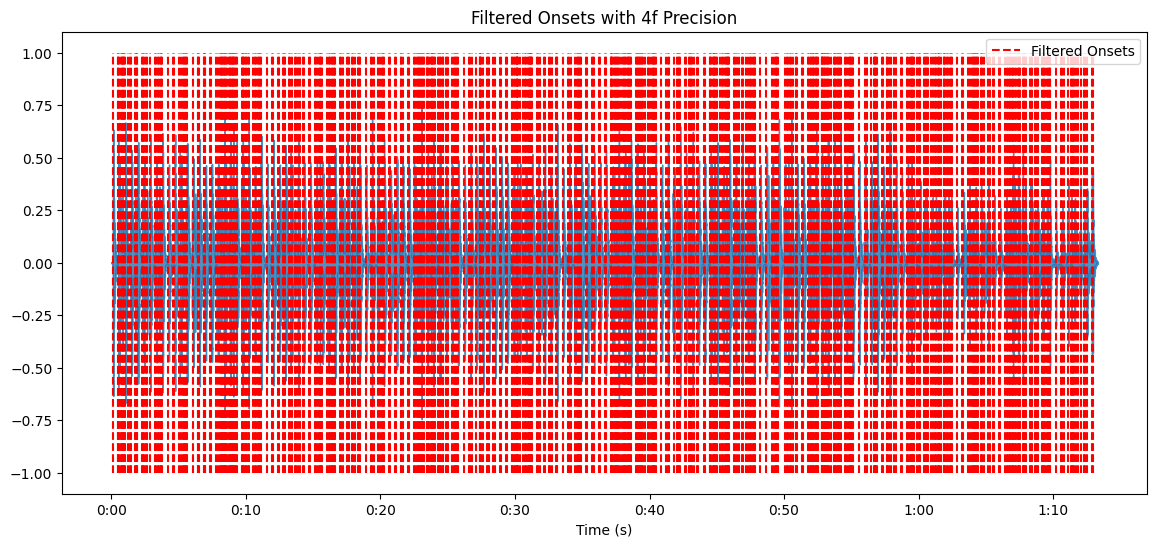

Filtered Onset times (in seconds): [ 0.10303855  0.47310658  0.49922902  0.56163265  0.70385488  0.79963719
  0.83736961  0.84462585  0.93170068  1.021678    1.26113379  1.38884354
  1.48027211  1.77197279  1.84888889  1.86485261  1.93741497  2.30603175
  2.31183673  2.39746032  2.53678005  2.62820862  2.85605442  3.21741497
  3.31464853  3.45396825  3.55265306  3.69197279  3.70213152  3.76888889
  4.22312925  4.59900227  4.68897959  5.06049887  5.1475737   5.28979592
  5.43056689  5.44653061  5.52634921  5.60326531  6.06331066  6.43047619
  6.44208617  6.52045351  6.89052154  6.90068027  6.95002268  6.98195011
  7.35782313  7.43328798  7.80045351  7.89768707  8.0370068   8.12408163
  8.18793651  8.25614512  8.35047619  8.38965986  8.41433107  8.49705215
  8.57106576  8.71764172  8.80036281  8.81342404  8.89904762  8.95129252
  9.04562358  9.05868481  9.09786848  9.19655329  9.26911565  9.35473923
  9.72480726  9.79446712  9.8031746   9.86993197  9.96861678 10.01795918
 10.18920635 10.

In [11]:
# Assuming `onset_times` is a NumPy array of onset times in seconds

import numpy as np

# Step 1: Round onset times to x decimal places
rounded_onsets = np.round(onset_times, 3)

# Step 2: Identify unique onsets and their first occurrence indices
unique_onsets, indices = np.unique(rounded_onsets, return_index=True)

# Step 3: Sort the indices to maintain the original order
sorted_indices = np.sort(indices)

# Step 4: Filter the original onset_times using the sorted unique indices
filtered_onset_times = onset_times[sorted_indices]

# (Optional) Print the results
print('Original number of onsets:', len(onset_times))
print('Filtered number of onsets:', len(filtered_onset_times))

# Replace the original onset_times with the filtered ones if desired
onset_times = filtered_onset_times

# (Optional) Update the plot to reflect filtered onsets
plt.figure(figsize=(14, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.vlines(onset_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Filtered Onsets')
plt.title('Filtered Onsets with 4f Precision')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# (Optional) Print the filtered onset times
print('Filtered Onset times (in seconds):', onset_times)


In [12]:
import pandas as pd

# Create a DataFrame
df_seq = pd.DataFrame({"onset_times": onset_times})


# Define the file path
file_path = 'vision_onsets_librosa_unfiltered2.csv'

# Save the DataFrame to a CSV file
df_seq.to_csv(file_path, index=False)

# Print the dynamic message
print(f"Sequence has been saved to '{file_path}'")

Sequence has been saved to 'vision_onsets_librosa_unfiltered2.csv'


some synth shots were still not detected!